<a href="https://colab.research.google.com/github/Villagran29A/Clasificador/blob/main/ClasificadorObj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anteriormente se realizo una regresion, en estos casos las salidas y entradas
del problemason numeros.
por ejemplo: Valor de casa, grados, cuentas, etc.

En los problemas de clasificacion ubicamos una imagen y se debera de asignar
a una clasificacion, cada clasificacion sera una neurona, es decir, si tengo 10
clasificaciones tendre 10 neuronas

- Capas Ocultas: Nos permitiran realizar mas opciones a nuestra red neuronal.
- Funcion de activacion: Permiten que nuestra red pueda resolver problemas no lineales, pero se recomienda utilizar en problemas con mas de una neurona

Estas 2 herramientas nos daran demasiadas posibilidades para solucionar problemas

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [ ]:
#Descargar el dataset de datos necesarios
datos, metadatos = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

In [ ]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']
nombres_clases = metadatos.features['label'].names
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#normalizacion de dato
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #se normalizan los datos de 0 a 255 y de 0 a 1
  return imagenes, etiquetas
#Normalizar los datos de entrenamiento
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)
#Agregar a cache (se utiliza la memoria en lugar del disco, esto hace el entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()


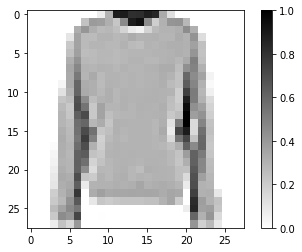

In [ ]:
#Visualizacion de la imagen
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
#Se redimensiona la imagen
imagen = imagen.numpy().reshape((28,28))

import matplotlib.pyplot as plt
#dibujar la imagen
plt.figure()
plt.imshow(imagen, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


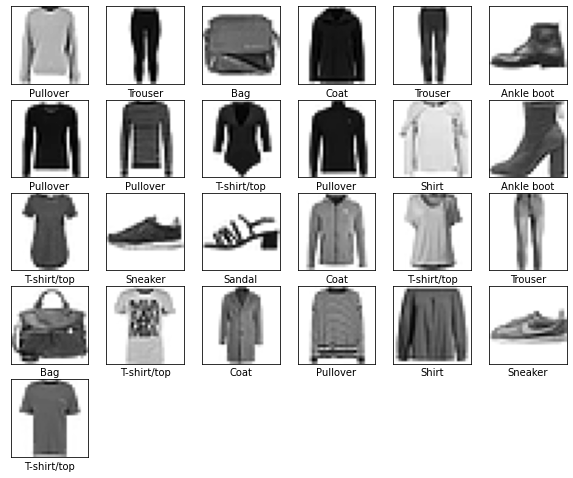

In [ ]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap = plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [ ]:
#creacion del modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
  tf.keras.layers.Dense(50, activation = tf.nn.relu),
  tf.keras.layers.Dense(50, activation = tf.nn.relu),
  tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [ ]:
#compilacion del modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [ ]:
#asignacion de la cantidad de ejemplo para entrenar
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [ ]:
#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
TAMANO_LOTE = 32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
#hacer que se entrene mas rapido por medio de la asignacion de lotes y de manera aleatoria
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
import math
#Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 13s 2ms/step - loss: 0.5199 - accuracy: 0.8166
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3857 - accuracy: 0.8597
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3475 - accuracy: 0.8735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3270 - accuracy: 0.8806
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3096 - accuracy: 0.8856


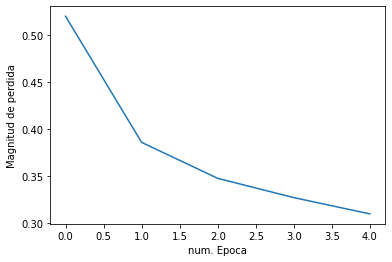

In [ ]:
plt.xlabel("num. Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

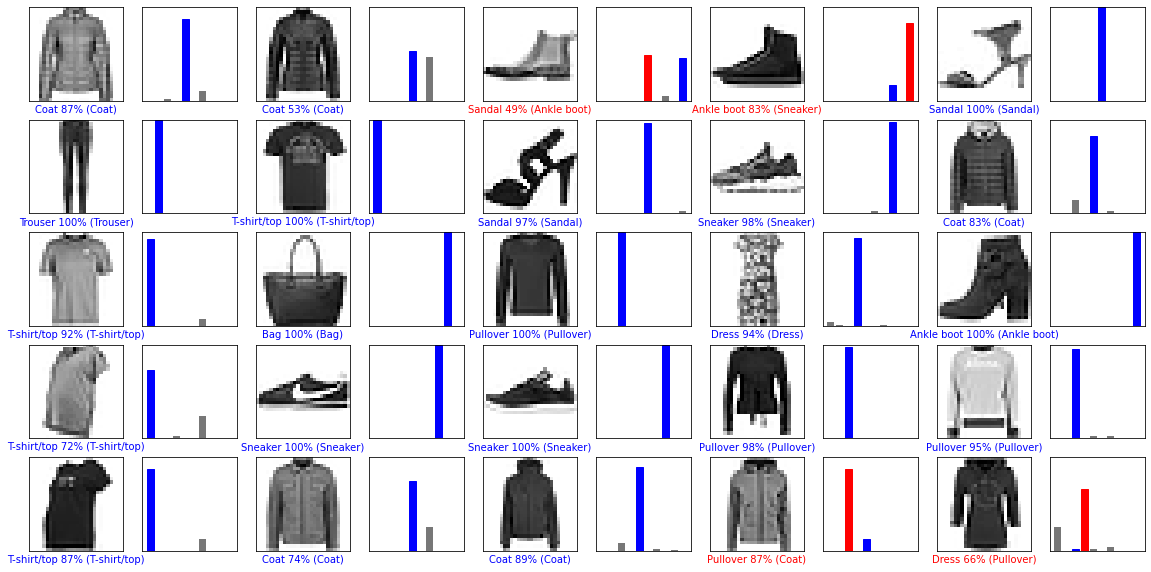

In [ ]:
#Impresion y prediccion de los objetos que se muestran
#azul = correcto
#rojo = incorrecto
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [ ]:
#Probar una imagen suelta
imagen = imagenes_prueba[1] 
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])

Prediccion: Coat
